# This tutoral is on basic statistics.

In [27]:
import os, sys
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, Latex

from scipy.stats import chi2, t, f

In [6]:
# =================================
# Add the parent directory to the Python path
def get_parent_dir():
    try:
        # Works when running a script
        current_dir = os.path.dirname(__file__)
    except NameError:
        # Works in notebooks / REPL
        current_dir = os.getcwd()
    return os.path.abspath(os.path.join(current_dir, '..'))

parent_dir = get_parent_dir()
sys.path.append(parent_dir)
# =================================
print(parent_dir)

/Users/xdu4/Documents/Duxiuxia/source_code_repository/github_duxiuxia-bioinformatics/teach_machine_learning_and_ai/src/teaching


In [8]:
# import data
in_file_name = 'NHANES_PFAS_J_2017-2018.csv'
in_file_full_name = os.path.join(parent_dir, 'data', in_file_name)
data_df = pd.read_csv(in_file_full_name)
print(data_df.shape)
print(data_df.columns)

(2133, 20)
Index(['SEQN', 'WTSB2YR', 'LBXPFDE', 'LBDPFDEL', 'LBXPFHS', 'LBDPFHSL',
       'LBXMPAH', 'LBDMPAHL', 'LBXPFNA', 'LBDPFNAL', 'LBXPFUA', 'LBDPFUAL',
       'LBXNFOA', 'LBDNFOAL', 'LBXBFOA', 'LBDBFOAL', 'LBXNFOS', 'LBDNFOSL',
       'LBXMFOS', 'LBDMFOSL'],
      dtype='object')


## Descriptive statistics

Sample mean
$$
\bar{X} = \frac{\sum_{i=1}^n x_i}{n}
$$
Sample mean reflects central tendency of the data.


In [12]:
variable_name = 'LBXPFDE'

In [13]:
x_bar = data_df[variable_name].mean()
print(x_bar)

0.2733333333333333


Sample median: the middle value in a dataset when arranged in order, separating the higher half from the lower half.

In [16]:
sample_median = data_df[variable_name].median()
print(sample_median)

0.2


Sample variance
$$
s^2 = \frac{\sum_{i=1}^n (x_i - \bar{X})^2}{n-1}
$$
Sample variance reflects deviation of the data from the mean.

In [14]:
s_squared = data_df[variable_name].var()
print(s_squared)

0.12979795988934953


Sample standard deviation
$$
s = \sqrt{s}
$$
Sample standard deviation reflects deviation of the data from the mean and has the same unit as $x_i$.

In [15]:
s = data_df[variable_name].std()
print(s)

0.360274839378702


Range = max(x) - min(x)

In [17]:
sample_range = data_df[variable_name].max() - data_df[variable_name].min()
print(sample_range)

6.83


Distribution: can be visualized as a histogram, boxplot, or density plot

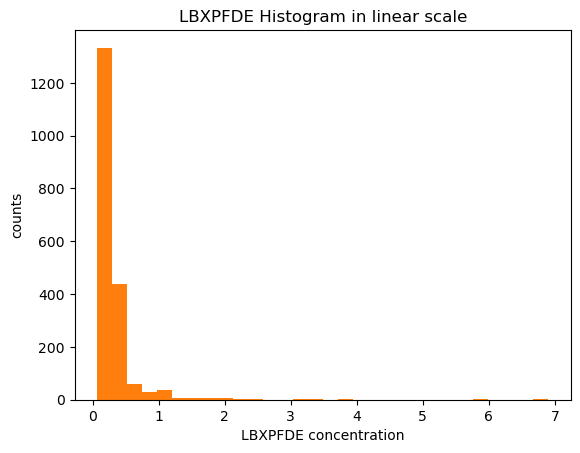

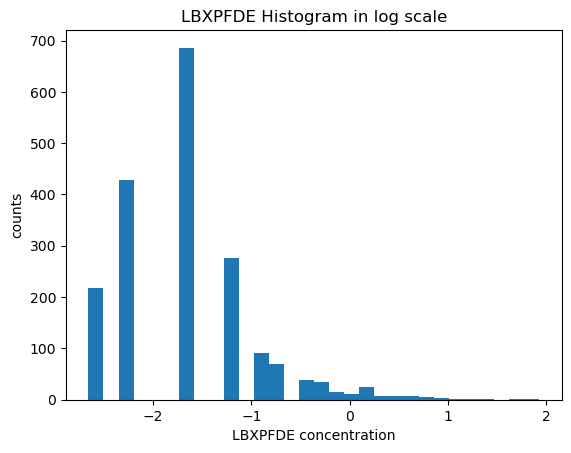

In [26]:
# Histogram in linear scale
plt.hist(data_df[variable_name].dropna(), bins=30)

plt.hist(data_df[variable_name].dropna(), bins=30)
plt.xlabel(f'{variable_name} concentration')
plt.ylabel(f'counts')
plt.title(f'{variable_name} Histogram in linear scale')
plt.show()

# Histogram in log scale
plt.hist(np.log(data_df[variable_name].dropna()), bins=30)
plt.xlabel(f'{variable_name} concentration')
plt.ylabel(f'counts')
plt.title(f'{variable_name} Histogram in log scale')
plt.show()

Boxplot or box-and-whisker plot

It summarizes a dataset's distribution, especially when you want to compare groups or spot outliers quickly. Each boxplot is built from five key numbers:

- Minimum
- Q1 (1st quartile): 25 of data below this
- Median (Q2): middle value
- Q3 (3rd quartile): 75 of data below this
- Maximum


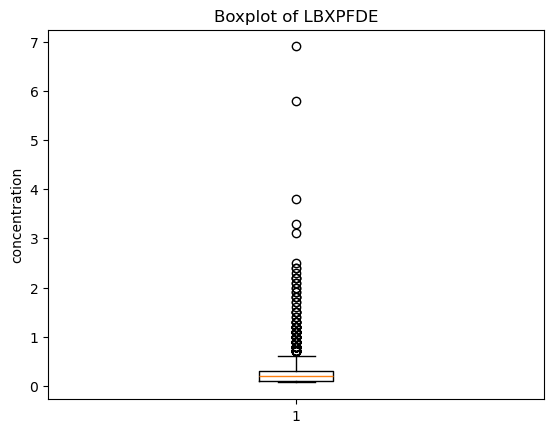

In [28]:
plt.boxplot(data_df[variable_name].dropna())
plt.ylabel('concentration')
plt.title(f'Boxplot of {variable_name}')
plt.show()

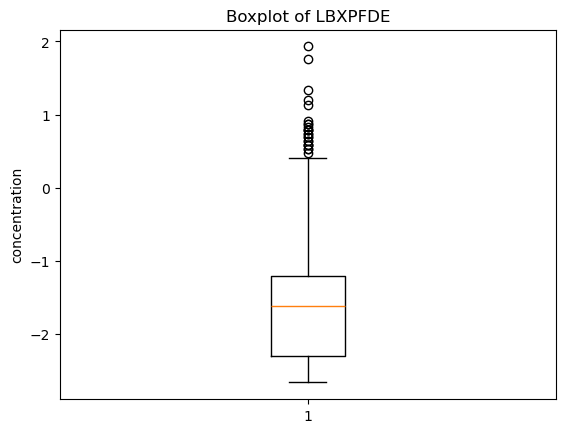

In [29]:
plt.boxplot(np.log(data_df[variable_name].dropna()))
plt.ylabel('concentration')
plt.title(f'Boxplot of {variable_name}')
plt.show()

Parts of a boxplot.

- The box
    - Span from Q1 to Q3
    - Contains the middle 50% of the data
    - Its height = IQR (Interquartile Range): IQR = Q3 - Q1
- The line in the box is the median
- The whiskers extend to the smallest and largest values within Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
- The dots beyond whiskers are outliers that are unusually small or large values.

How to interpret a boxplot?

- Center
    - Median tells us where the data is centered
- Spread
    - Big box --> data is more variable
    - Small box --> data is more consistent
- Skewness
    - Median closer to bottom of box --> right-skewed
    - Median closer to the top of box --> left-skewed
- Outliers
    - Points far away from the box --> potential errors, rare events, or special cases


Density plots: Also called a KDE plot, shows the smoothed distribution of the data

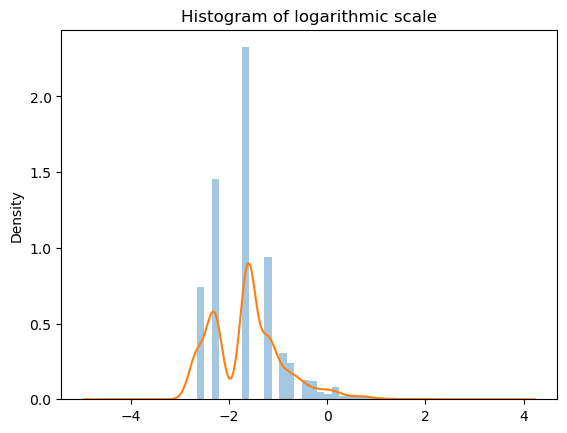

In [31]:
x = np.log(data_df[variable_name].dropna())
plt.hist(x, bins=30, density=True, alpha=0.4)
x.plot(kind='density')
plt.title('Histogram of logarithmic scale')
plt.show()

## Toy examples

### mean, variance, covariance, correlation, and cosine similarity

In [2]:
# mean
xx = np.array([1, 2, 3, 4, 5, 6])
mu_xx = sum(xx) / len(xx)
print(mu_xx)
print(np.mean(xx))

3.5
3.5


In [5]:
# mean centering
xx = np.array([1,2,3,4,5])
print(xx - xx.mean())

# mean of mean-centered data is 0.0
print(np.mean(xx - xx.mean()))

[-2. -1.  0.  1.  2.]
0.0


In [6]:
# variance: pay attention to the Delta Degree of Freedom (ddof)
var_xx = sum((xx-xx.mean())*(xx-xx.mean()))/(len(xx))
print(var_xx)
print(np.var(xx, ddof=0))

2.0
2.0


In [8]:
var_xx = sum((xx-xx.mean())*(xx-xx.mean()))/(len(xx)-1)
print(var_xx)
print(np.var(xx, ddof=1))

2.5
2.5


In [9]:
# covariance
yy = np.array([2, 4, 6, 8, 10])

var_yy = sum((yy-yy.mean())*(yy-yy.mean()))/(len(yy)-1)
print(var_yy)
print(np.var(yy, ddof=1))
print()

10.0
10.0



In [10]:
cov_xx_yy = sum((xx-mu_xx)*(yy-yy.mean()))/(len(xx)-1)
print(cov_xx_yy)

5.0


In [12]:
print(np.cov(xx, yy, ddof=0))
print()
print(np.cov(xx, yy, ddof=1))

[[2. 4.]
 [4. 8.]]

[[ 2.5  5. ]
 [ 5.  10. ]]


In [13]:
# correlation
print(np.corrcoef(xx, yy))

[[1. 1.]
 [1. 1.]]


In [14]:
zz = np.array([1, 7, 4, 3, 2])
print('covariance')
print(np.cov(xx, zz))
print()

print('correlation')
print(np.corrcoef(xx, zz))
print()

covariance
[[ 2.5 -0.5]
 [-0.5  5.3]]

correlation
[[ 1.         -0.13736056]
 [-0.13736056  1.        ]]



Correlation is equal to the cosine similarity of mean-centered data

In [15]:
cosine = np.dot(xx, zz) / (np.linalg.norm(xx, ord=2) * np.linalg.norm(zz, ord=2))
print(cosine)

cosine = np.dot(xx-xx.mean(), zz-zz.mean()) / (np.linalg.norm(xx-xx.mean(), ord=2) * np.linalg.norm(zz-zz.mean(), ord=2))
print(cosine)

0.7433634259021153
-0.137360563948689


### dot product

In [16]:
dot_product = sum(xx*yy)
print(dot_product)
dot_product = np.dot(xx, yy)
print(dot_product)

110
110


In [17]:
magnitude_xx = np.sqrt(sum(xx*xx))
print(magnitude_xx)
magnitude_xx = np.linalg.norm(xx, ord=2)
print(magnitude_xx)

7.416198487095663
7.416198487095663


In [18]:
magnitude_yy = np.sqrt(sum(yy*yy))

cosine_similarity = dot_product / (magnitude_xx * magnitude_yy)
print(cosine_similarity)

1.0


In [20]:
# mean-center xx and yy, and re-calculate cosine value
xx_mean_centered = xx-xx.mean()
yy_mean_centered = yy-yy.mean()
dot_product = sum(xx_mean_centered * yy_mean_centered)
magnitude_xx_mean_centered = np.sqrt(sum(xx_mean_centered*xx_mean_centered))
magnitude_yy_mean_centered = np.sqrt(sum(yy_mean_centered*yy_mean_centered))
print(dot_product / (magnitude_xx_mean_centered*magnitude_yy_mean_centered))

0.9999999999999998


In [22]:
xx = np.array([1, 2])
yy = np.array([2, 4])
cosine_similarity = sum(xx*yy)/(np.sqrt(sum(xx**2)) * np.sqrt(sum(yy**2)))
print(cosine_similarity)

0.9999999999999998


In [23]:
zz = xx - 5
cosine_similarity = sum(zz*yy)/(np.sqrt(sum(zz**2)) * np.sqrt(sum(yy**2)))
print(cosine_similarity)

-0.8944271909999159


## Statistical distributions

### Uniform distributions

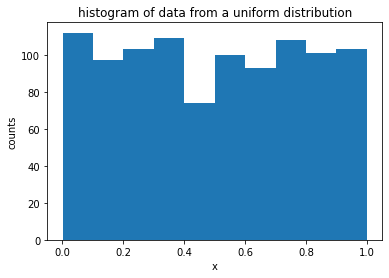

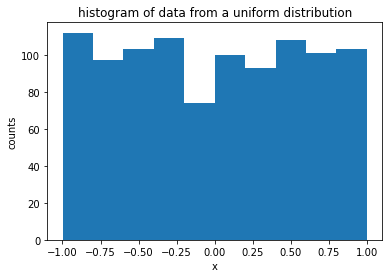

In [35]:
# generate uniformly distributed random numbers and plot the histogram
x = np.random.rand(1000)
fig, ax = plt.subplots()
ax.hist(x)
ax.set_xlabel('x')
ax.set_ylabel('counts')
ax.set_title('histogram of data from a uniform distribution')
print()

yy = 2 * x - 1
fig, ax = plt.subplots()
ax.hist(yy)
ax.set_xlabel('x')
ax.set_ylabel('counts')
ax.set_title('histogram of data from a uniform distribution')

# another way to generate uniformly distributed random numbers
x = np.random.uniform(1000)

### Gaussian distributions

<class 'numpy.ndarray'>
length of counts = 100
length of bin_edges = 101

<class 'numpy.ndarray'>
length of hist_result[0] =100
[  1.   0.   1.   0.   1.   0.   0.   0.   1.   1.   1.   2.   6.   0.
   5.   2.   4.   9.   7.  10.  15.  21.  26.  26.  37.  34.  23.  54.
  51.  49.  82.  91. 115.  95. 125. 149. 156. 170. 192. 190. 214. 220.
 224. 268. 272. 299. 312. 314. 320. 319. 299. 306. 324. 308. 317. 324.
 253. 285. 285. 274. 267. 229. 206. 197. 178. 171. 143. 161. 135. 119.
  99.  91.  84.  57.  63.  62.  34.  44.  36.  15.  28.  23.  16.   8.
   9.   8.   5.   4.   5.   2.   2.   2.   0.   2.   0.   1.   2.   2.
   0.   1.]

<class 'numpy.ndarray'>
length of hist_result[1] = 100
[-4.16280675 -4.08234098 -4.00187521 -3.92140945 -3.84094368 -3.76047791
 -3.68001214 -3.59954638 -3.51908061 -3.43861484 -3.35814907 -3.2776833
 -3.19721754 -3.11675177 -3.036286   -2.95582023 -2.87535446 -2.7948887
 -2.71442293 -2.63395716 -2.55349139 -2.47302562 -2.39255986 -2.31209409
 -2.23162832 -2.1

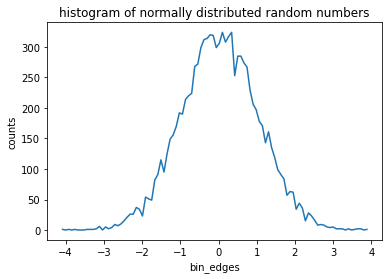

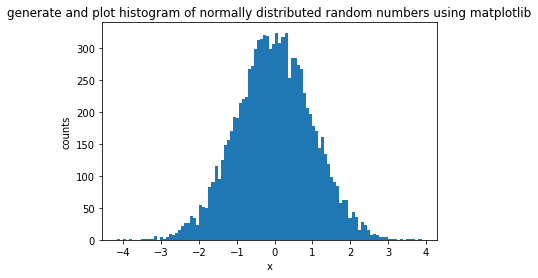

In [38]:
# generate normally distributed random numbers and plot the histogram
x = np.random.normal(loc=0.0, scale=1.0, size=10000)
counts, bin_edges = np.histogram(x, bins=100)
print(type(counts))
print('length of counts = ' + str(len(counts)))
print('length of bin_edges = ' + str(len(bins)))
print()

# plot the histogram based on the results from np.histogram
fig, ax = plt.subplots()
ax.plot(bin_edges[1:], counts)
ax.set_xlabel('bin_edges')
ax.set_ylabel('counts')
ax.set_title('histogram of normally distributed random numbers')

# plot the histogram directly using matplotlib.pyplot
fig, ax = plt.subplots()
hist_result = plt.hist(x, bins=100)
ax.set_xlabel('x')
ax.set_ylabel('counts')
ax.set_title('generate and plot histogram of normally distributed random numbers using matplotlib')

# counts
print(type(hist_result[0]))
print('length of hist_result[0] =' + str(len(hist_result[0])))
print(hist_result[0])
print()

# bins
print(type(hist_result[1]))
print('length of hist_result[1] = ' + str(len(hist_result[0])))
print(hist_result[1])


### chi-squared distribution

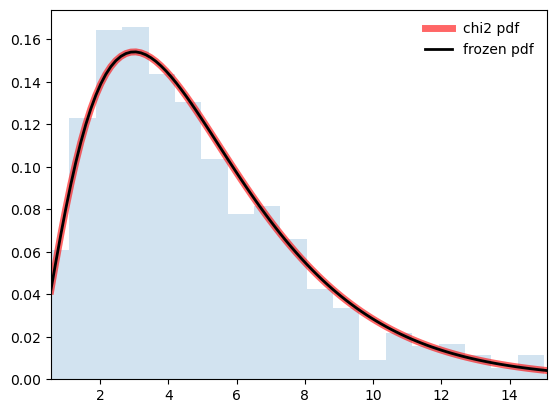

In [24]:
df = 5

x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
rv = chi2(df)
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
r = chi2.rvs(df, size=1000)
ax.hist(r, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)

### Student's t distribution

0.9758939106344332
0.024106089365566796


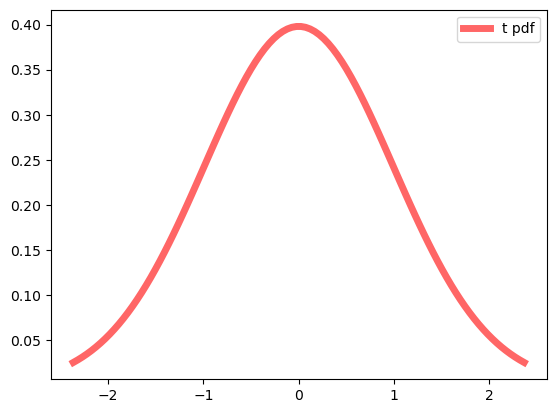

In [25]:
df = 100

fig, ax = plt.subplots(1, 1)
mean, var, skew, kurt = t.stats(df, moments='mvsk')
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.6, label='t pdf')
ax.legend()

print(t.cdf(2, df))
print(1.0 - t.cdf(2, df))

### F distribution

lower and upper x boundary:
0.27535706796358933
4.32127784414467

[0.27535707 1.01440182 4.32127784]

True

p_vlaue =0.0634


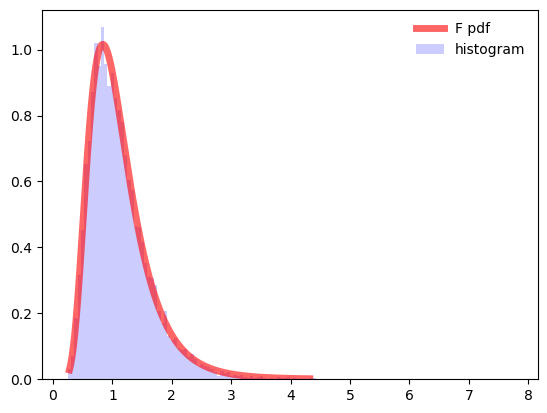

In [26]:
# the degree of freedom for the numerator and denominator defines an F distribution
dfn, dfd = 29, 18 # 1, 10 # 29, 18

lower_cdf = 0.001
upper_cdf = 0.999
lower_x_boundary = f.ppf(lower_cdf, dfn, dfd)
print('lower and upper x boundary:')
print(lower_x_boundary)
upper_x_boundary = f.ppf(upper_cdf, dfn, dfd)
print(upper_x_boundary)
print()

num_of_x_point = 10000

x = np.linspace(lower_x_boundary, upper_x_boundary, num_of_x_point)

# plot the density of an F distribution
pdf = f.pdf(x, dfn, dfd)
fig, ax = plt.subplots()
ax.plot(x, pdf, 'r-', lw=5, alpha=0.6, label='F pdf')

# Check accuracy of cdf and ppf
cdf_list = [0.001, 0.5, 0.999]
x_vals_for_specified_cdf = f.ppf(cdf_list, dfn, dfd)
print(x_vals_for_specified_cdf)
print()

tf = np.allclose([0.001, 0.5, 0.999], f.cdf(x_vals_for_specified_cdf, dfn, dfd))
print(tf)
print()

# generate random numbers
rvs = f.rvs(dfn, dfd, size=num_of_x_point)

# compare the histogram with the distribution
ax.hist(rvs, density=True, bins='auto', histtype='stepfilled', alpha=0.2, label='histogram', color='blue')

ax.legend(loc='best', frameon=False)

# get the p-value for a particular F-statistic value
f_statistic = 2.0
p_value = 1.0 - f.cdf(f_statistic, dfn, dfd)
print('p_vlaue =' + str(round(p_value,4)))

In [28]:
# mean squared error
from sklearn.metrics import mean_squared_error

y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
print(y_true)
print(y_pred)

[[0.5, 1], [-1, 1], [7, -6]]
[[0, 2], [-1, 2], [8, -5]]


The formula for Mean Squared Error is:

$MSE = \frac{1}{n} \sum_{i=1}^n \left( y_i - \hat{y}_i \right)$

In [29]:
mse = mean_squared_error(y_true, y_pred)
print(mse)

0.7083333333333334


In [ ]:
mean_squared_error(y_true, y_pred, multioutput='raw_values')
y_true = [0.5, -1, 7]
y_pred = [0, -1, 8]
mean_squared_error(y_true, y_pred)
y_true = [1, 1, -6]
y_pred = [2, 2, -5]
mean_squared_error(y_true, y_pred)